### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

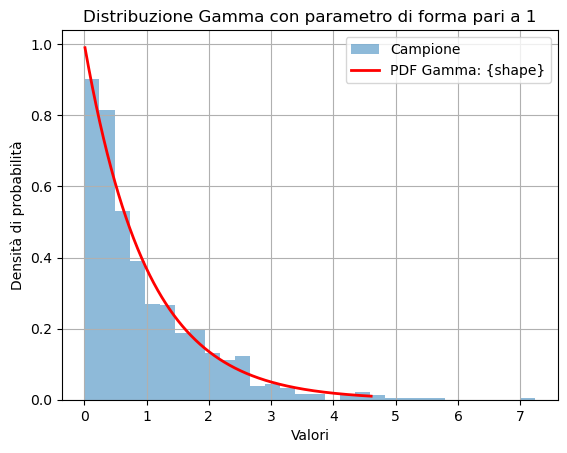

Parametro di forma stimato: 1.0386386749140484
Parametro di scala stimato: 0.9244703434175296
Parametro di localizzazione stimato: 0


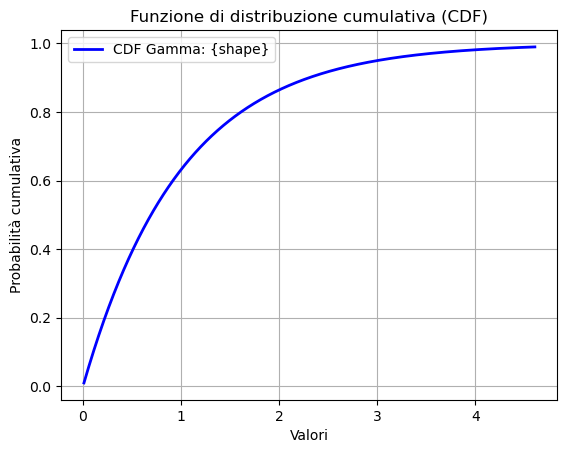

Varianza stimata: 0.855
Varianza campionaria del campione: 0.899


In [6]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
#1 Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1
shape = 1
campione = st.gamma.rvs(shape, size=1000) #Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1

#2 Traccio il grafico del campione e sovrappongo la PDF della distribuzione
plt.hist(campione, bins=30, density=True, alpha=0.5, label='Campione')

#Genero i valori x per la PDF
x = np.linspace(st.gamma.ppf(0.01, shape), st.gamma.ppf(0.99, shape), 1000)
plt.plot(x, st.gamma.pdf(x, shape), 'r-', lw=2, label='PDF Gamma: {shape}')

plt.title('Distribuzione Gamma con parametro di forma pari a 1')
plt.xlabel('Valori')
plt.ylabel('Densità di probabilità')
plt.legend()
plt.grid()
plt.show()

#3 stima del parametro di forma dal campione usando il metodo fit
shape_stimato, loc, scale = st.gamma.fit(campione, floc=0)
print(f"Parametro di forma stimato: {shape_stimato}")
print(f"Parametro di scala stimato: {scale}")
print(f"Parametro di localizzazione stimato: {loc}")

#4 traccio la funzione di distribuzione cumulativa (CDF)
plt.figure()
plt.plot(x, st.gamma.cdf(x, shape), 'b-', lw=2, label='CDF Gamma: {shape}')
plt.title('Funzione di distribuzione cumulativa (CDF)')
plt.xlabel('Valori')
plt.ylabel('Probabilità cumulativa')
plt.legend()
plt.grid()
plt.show()

#5 calclolo la varianza
varianza = st.gamma.var(shape, loc=loc, scale=scale)
print(f"Varianza stimata: {varianza:.3f}")

var_camp = np.var(campione) #calcolo la varianza del campione
print(f"Varianza campionaria del campione: {var_camp:.3f}")

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

Text(0, 0.5, 'Min and max temperature')

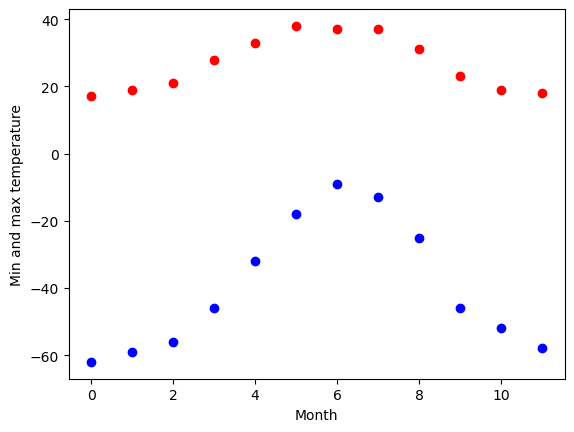

In [2]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")



          3          2
-0.01981 x - 0.3571 x + 6.326 x + 14.21
         3          2
-0.1357 x + 0.7358 x + 8.323 x - 67.21


Text(0, 0.5, 'Min and max temperature')

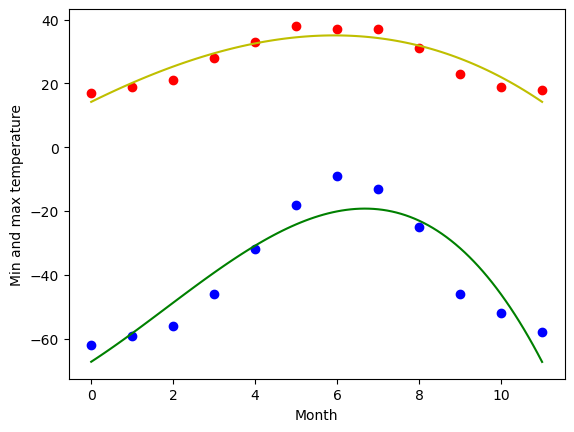

In [10]:
#Provo a fittare i dati forniti mediante numPy
#numPy --> Fittare i dati con una curtva polinomiale
# provo a fittare i dati con un polinomio di grado 3

#np.polyfit --> Restituisce i coefficienti del polinomio di grado n che meglio approssima i dati
#Un oggetto polinomiale è un polinomio k1x^n + k2x^(n-1) + ... + kn

#Fitto i dati per temperature massime - grado 3
coef_t_max = np.polyfit(months, temp_max, 3) #Coeficienti del polinomio temperature max
poly_t_max = np.poly1d(coef_t_max) #Creo un oggetto polinomiale
print(poly_t_max) #Stampa i coefficienti del polinomio

#Fitto i dati per temperature minime - grado 3
coef_t_min = np.polyfit(months, temp_min, 3) #Coeficienti del polinomio temperature min
poly_t_min = np.poly1d(coef_t_min) #Creo un oggetto polinomiale
print(poly_t_min) #Stampa i coefficienti del polinomio

#Calcolo i valori per il grafico 
#Genera 100 punti equidistanti tra 0 e 11 (inclusi) per il polinomio
x_fit = np.linspace(0, 11, 100)
y_max_fit = poly_t_max(x_fit) #Calcolo i valori del polinomio per temperature max
y_min_fit = poly_t_min(x_fit) #Calcolo i valori del polinomio per temperature min


#Visualizzazione del polinomio e del grafico
plt.plot(months, temp_max, "ro")
plt.plot(x_fit, y_max_fit, 'y-')
plt.plot(months, temp_min, "bo")
plt.plot(x_fit, y_min_fit, 'g-')
plt.xlabel("Month")
plt.ylabel("Min and max temperature")


Parametri del fit: a=10.58, b=0.59, c=-1.82, d=27.95


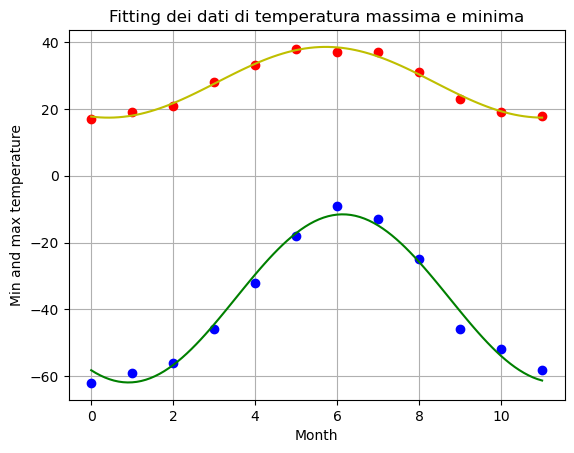

In [12]:
#Ora provo a fittare i dati forniti mediante scipy
#scipy --> Fittare i dati con una 
import scipy.optimize as opt

#Definisco una funzione per dati periodici
def val_periodic(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

#Fit con stima iniziale dei parametri
initial_value = [10, 2*np.pi/11, 0, 25]
params_t_max, covariance_t_max = opt.curve_fit(val_periodic, months, temp_max, p0=initial_value)
params_t_min, covariance_t_min = opt.curve_fit(val_periodic, months, temp_min, p0=initial_value)

#Valori del fit
a_fit_max, b_fit_max, c_fit_max, d_fit_max = params_t_max
a_fit_min, b_fit_min, c_fit_min, d_fit_min = params_t_min #Valori minimi del fit
print(f"Parametri del fit: a={a_fit_max:.2f}, b={b_fit_max:.2f}, c={c_fit_max:.2f}, d={d_fit_max:.2f}")

#Calcolo i valori per la curva continua
x_fit = np.linspace(0, 11, 100)
y_fit_max=val_periodic(x_fit, a_fit_max, b_fit_max, c_fit_max, d_fit_max) #Calcolo i valori del polinomio per temperature max
y_fit_min = val_periodic(x_fit, a_fit_min, b_fit_min, c_fit_min, d_fit_min) #Calcolo i valori del polinomio per temperature min

#Visualizzo il polinomio ed il grafico
plt.plot(months, temp_max, "ro")
plt.plot(x_fit, y_fit_max, 'y-')
plt.plot(months, temp_min, "bo")
plt.plot(x_fit, y_fit_min, 'g-')
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
plt.title("Fitting dei dati di temperatura massima e minima")
#plt.legend(["Temperature massime", "Fit temperature massime", "Temperature minime", "Fit temperature minime"])
plt.grid()
plt.show()

### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

In [13]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


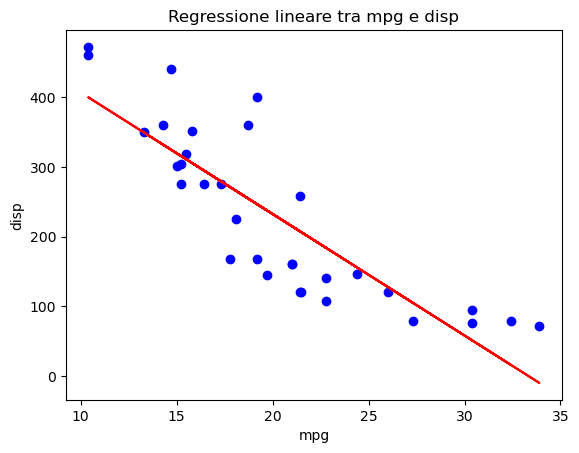

Errore quadratico medio: 4191.27
Coefficiente di determinazione R^2: 0.72


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Preparo i dati per il fitting
# Seleziono le colonne di interesse
df['mpg'] = pd.to_numeric(df['mpg'], errors = 'coerce')
df['disp'] = pd.to_numeric(df['disp'], errors = 'coerce')   # Convert 'mpg' to float

x = df[['mpg']]  # Miles per gallon
y = df['disp']   # Cylindrate of motor in cubic inches

#Si vuole fare una regressione lineare per stimare la cilindrata in funzione dei mpg
#Creo il modello di regressione lineare
model = LinearRegression()

#Allenare il modello sui dati
model.fit(x,y)

#Fare delle previsioni col modello allenato
y_pred = model.predict(x)

#Visualizzo i dati e la retta di regressione
plt.scatter(x, y, color='blue', label='Dati originali')
plt.plot(x, y_pred, color='red', label='Retta di regressione')
plt.xlabel('mpg')
plt.ylabel('disp')
plt.title('Regressione lineare tra mpg e disp')
plt.show()

mse = mean_squared_error(y, y_pred) #Calcolo l'errore quadratico medio
r2 = r2_score(y, y_pred) #Calcolo il coefficiente di determinazione R^2

#Stampo a video i risultati di valutazione del modello
print(f"Errore quadratico medio: {mse:.2f}")
print(f"Coefficiente di determinazione R^2: {r2:.2f}")

